In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
import random

In [ ]:
dataset_enron = pd.read_csv('features-enron.csv')
dataset_phishy = pd.read_csv('features-phishing.csv')

In [ ]:
dataset_enron

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,0,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1,1,False,0,0,7bit,0,False,False,False,False,False,0,False,0
2,2,False,0,0,7bit,0,False,False,False,False,False,0,False,0
3,3,False,0,0,7bit,0,False,False,False,False,False,0,False,0
4,4,False,0,0,quoted-printable,0,False,False,False,False,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2251,False,0,0,7bit,0,False,False,False,False,False,0,False,0
2252,2252,False,0,0,7bit,0,False,False,False,False,False,0,False,1
2253,2253,False,0,0,7bit,0,False,False,False,False,False,0,False,0
2254,2254,False,0,0,7bit,0,False,False,False,False,False,0,False,0


In [ ]:
dataset_phishy

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,0,False,0,0,none,0,False,True,False,False,True,0,True,2
1,1,False,0,0,7bit,0,False,True,False,False,False,0,True,2
2,2,False,0,0,7bit,0,False,True,False,False,False,0,True,2
3,3,False,0,0,8bit,0,False,True,False,False,True,0,True,3
4,4,False,0,0,8bit,0,False,True,False,False,True,0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2251,False,0,0,7bit,0,False,True,False,False,False,0,True,2
2252,2252,False,0,2,8bit\r\n,0,False,True,False,False,False,11,True,32
2253,2253,False,0,0,none,0,False,True,False,False,False,0,True,2
2254,2254,False,0,0,7bit,0,False,True,False,False,False,0,True,2


In [ ]:
df=pd.concat([dataset_enron, dataset_phishy])
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cols=["@ in URLs", "Flash content", "HTML content", "Html iFrame","Html Form", "IPs in URLs", "Phishy"]
df[cols] = df[cols].astype(int)
df

,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,0,0,0,7bit,0,0,0,0,0,0,0,0,0
1,0,0,0,7bit,0,0,0,0,0,0,0,0,0
2,0,0,0,7bit,0,0,0,0,0,0,0,0,0
3,0,0,0,7bit,0,0,0,0,0,0,0,0,0
4,0,0,0,quoted-printable,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,0,0,7bit,0,0,1,0,0,0,0,1,2
2252,0,0,2,8bit\r\n,0,0,1,0,0,0,11,1,32
2253,0,0,0,none,0,0,1,0,0,0,0,1,2
2254,0,0,0,7bit,0,0,1,0,0,0,0,1,2


In [ ]:
x=df.iloc[:, df.columns != "Phishy"]
y=df.iloc[:, -2]

In [ ]:
le = LabelEncoder()
x["Encoding"] = le.fit_transform(x["Encoding"])
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,URLs
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0,0,0,0,0,0,1,0,0,0,0,2
2252,0,0,2,4,0,0,1,0,0,0,11,32
2253,0,0,0,6,0,0,1,0,0,0,0,2
2254,0,0,0,0,0,0,1,0,0,0,0,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.45698751],
       [-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.15075942],
       [-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.38043049],
       ...,
       [-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.45698751],
       [-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.38043049],
       [-0.02354734, -0.05456747, -0.11145719, ..., -0.373583  ,
        -0.10110208, -0.38043049]])

In [ ]:
y_train, y_test = y_train.values, y_test.values

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_for=RandomForestClassifier(n_estimators=100)
random_for.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_NB  = classifier.predict(x_test)
y__KNN = model.predict(x_test)
y_DT = clf.predict(x_test)
y_RF = random_for.predict(x_test)

In [ ]:
ac_NB = accuracy_score(y_test, y_NB)
ac_KNN= accuracy_score(y_test, y__KNN)
ac_DT= accuracy_score(y_test, y_DT)
ac_RF= accuracy_score(y_test, y_RF)
pc_NB = precision_score(y_test,y_NB)
pc_KNN = precision_score(y_test,y__KNN)
pc_DT = precision_score(y_test,y_DT)
pc_RF = precision_score(y_test,y_RF)
rc_NB = recall_score(y_test,y_NB)
rc_KNN = recall_score(y_test,y__KNN)
rc_DT = recall_score(y_test,y_DT)
rc_RF = recall_score(y_test,y_RF)

In [ ]:
ac_NB, pc_NB, rc_NB

(0.654485049833887, 0.9856115107913669, 0.30648769574944074)

In [ ]:
ac_KNN, pc_KNN, rc_KNN

(0.9667774086378738, 0.9623059866962306, 0.970917225950783)

In [ ]:
ac_DT, pc_DT, rc_DT

(0.9712070874861573, 0.9586056644880174, 0.9843400447427293)

In [ ]:
ac_RF, pc_RF, rc_RF

(0.9678848283499446, 0.9504310344827587, 0.9865771812080537)

In [ ]:
models = ['Naive Bayes', "KNN", "Decision Tree", "Random Forest"]
accuracy_score = [ac_NB, ac_KNN, ac_DT, ac_RF]
precision_score = [pc_NB, pc_KNN, pc_DT, pc_RF]
recall_score = [rc_NB, rc_KNN, rc_DT, rc_RF]
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
n=len(models)

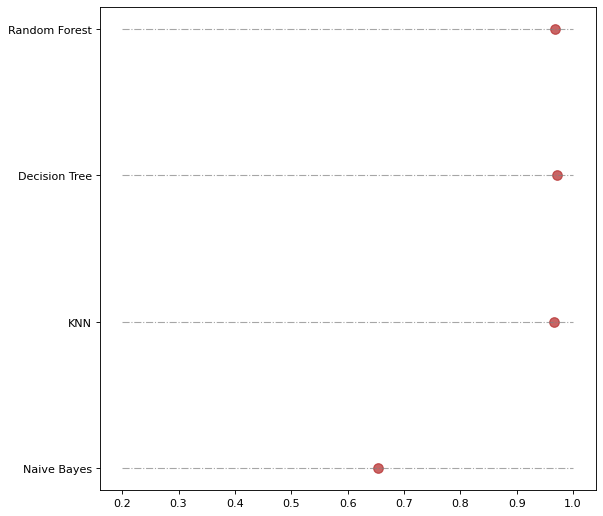

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), dpi= 80)
ax.hlines(y=models, xmin=0.2, xmax=1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=models, x=accuracy_score, s=75, color='firebrick', alpha=0.7)


Text(0.5, 1.0, 'Accuracy Score')

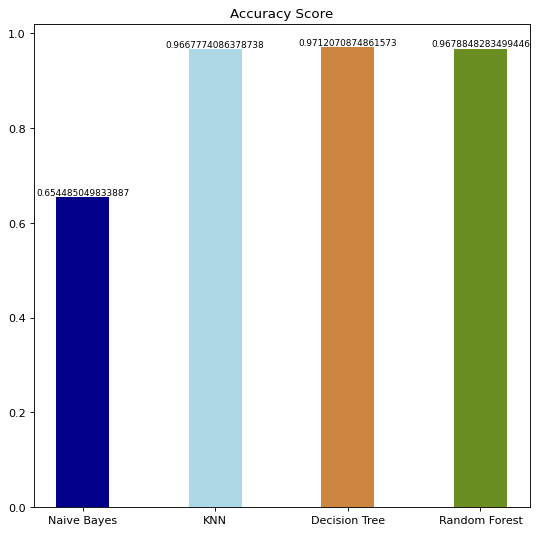

In [ ]:
c = random.choices(all_colors, k=n)
plt.figure(figsize=(8,8), dpi= 80)
pyplot.bar(models, accuracy_score, color=c, width = 0.4)
for i, val in enumerate(accuracy_score):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})
plt.title("Accuracy Score")

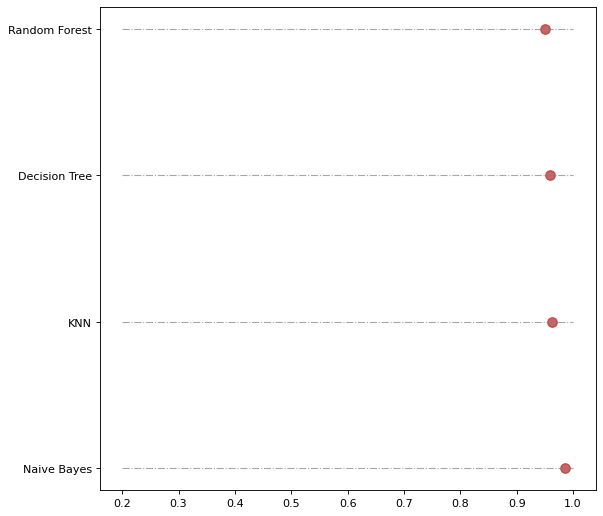

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), dpi= 80)
ax.hlines(y=models, xmin=0.2, xmax=1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=models, x=precision_score, s=75, color='firebrick', alpha=0.7)

Text(0.5, 1.0, 'Precision Score')

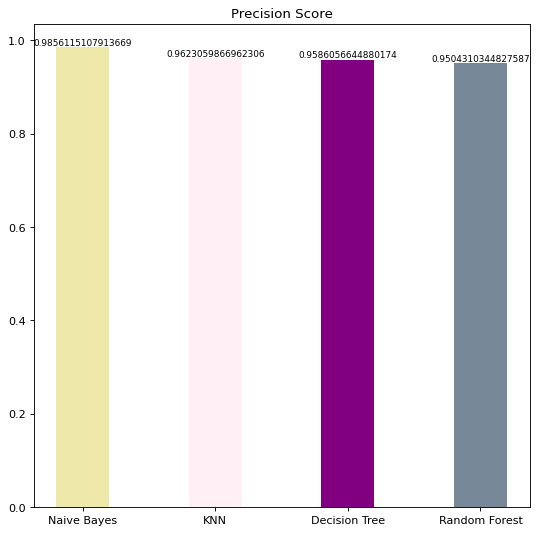

In [ ]:
c = random.choices(all_colors, k=n)
plt.figure(figsize=(8,8), dpi= 80)
pyplot.bar(models, precision_score, color=c, width = 0.4)
for i, val in enumerate(precision_score):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})
plt.title("Precision Score")

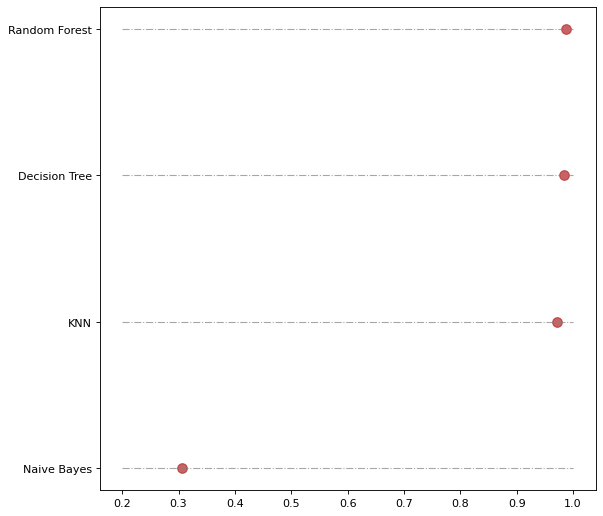

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), dpi= 80)
ax.hlines(y=models, xmin=0.2, xmax=1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=models, x=recall_score, s=75, color='firebrick', alpha=0.7)

Text(0.5, 1.0, 'Recall Score')

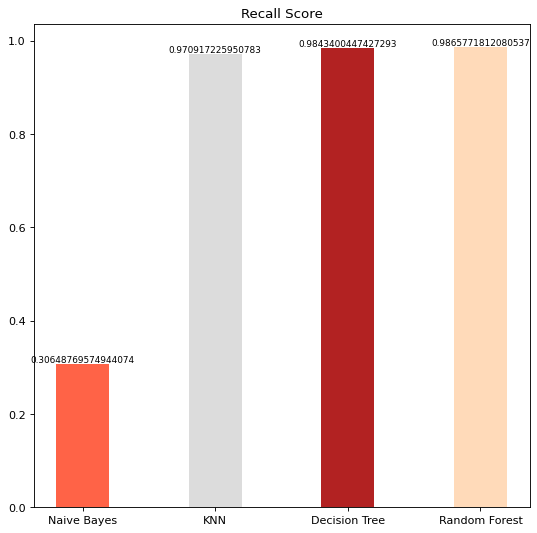

In [ ]:
c = random.choices(all_colors, k=n)
plt.figure(figsize=(8,8), dpi= 80)
pyplot.bar(models, recall_score
, color=c, width = 0.4)
for i, val in enumerate(recall_score
):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})
plt.title("Recall Score")